<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [3]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [4]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!


In [6]:
import numpy as np

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [14]:
batch_size = 64
max_len = 200
X_train.shape, y_train.shape

((8982,), (8982,))

In [16]:
X_train = sequence.pad_sequences(X_train, max_len)
X_test = sequence.pad_sequences(X_test, max_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [17]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.25, recurrent_dropout=0.2))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 30979)             3996291   
Total params: 8,093,315
Trainable params: 8,093,315
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 196s 22ms/sample - loss: 3.9071 - accuracy: 0.3476 - val_loss: 2.3883 - val_accuracy: 0.3664
Epoch 2/3
8982/8982 [==============================] - 200s 22ms/sample - loss: 2.4370 - accuracy: 0.3506 - val_loss: 2.3994 - val_accuracy: 0.3664
Epoch 3/3
2246/2246 [==============================] - 5s 2ms/sample - loss: 2.3834 - accuracy: 0.3664
Test score: 2.3833733868195557
Test accuracy: 0.3664292


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

This method cuts short and pads sequences to a specified length by removing values or adding dummy values till the length is reached.


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTMs are able store information and make predictions on time-dependent data. Traditional RNNs are unable to effectively predict time-dependent data because the information is not saved to refer to later.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Sentiment analysis - you can analyze the input of users to see trends in sentiment towards a product or service. An LSTM would be best suited for this because we want to see the feeling over time.

Text generation - you can predict what a user might input. Standard RNN would be sufficient because its dependent on position, but not time

Translation - you can translate between languages. A standard RNN would be suitable here for the same reason.


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [19]:
from skimage.io import imread_collection
from skimage.transform import resize #This might be a helpful function for you

images = imread_collection('./frog_images/*.jpg')

In [20]:
print(type(images))
print(type(images[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(images[0].shape)
print(images[1].shape)

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - Check for other things such as fish.

In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'banana':
      return entry[2]
  return 0.0

In [40]:
import requests

images = ['U4S3 Challenge/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg', 
          'U4S3 Challenge/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg',
          'U4S3 Challenge/frog_images/ed-van-duijn-S1zA6AR50X8-unsplash.jpg',
          'U4S3 Challenge/frog_images/elizabeth-explores-JZybccsrB-0-unsplash.jpg',
         'U4S3 Challenge/frog_images/jacky-watt-92W5jPbOj48-unsplash.jpg',
         'U4S3 Challenge/frog_images/jared-evans-VgRnolD7OIw-unsplash.jpg',
         'U4S3 Challenge/frog_images/joel-henry-Rcvf6-n1gc8-unsplash.jpg',
         'U4S3 Challenge/frog_images/marcus-neto-fH_DOdTt-pA-unsplash.jpg',
         'U4S3 Challenge/frog_images/matthew-kosloski-sYkr-M78H6w-unsplash.jpg',
         'U4S3 Challenge/frog_images/mche-lee-j-P8z4EOgyQ-unsplash.jpg',
         'U4S3 Challenge/frog_images/priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg',
         'U4S3 Challenge/frog_images/saturday_sun-_q37Ca0Ll4o-unsplash.jpg',
         'U4S3 Challenge/frog_images/serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg',
         'U4S3 Challenge/frog_images/yanna-zissiadou-SV-aMgliWNs-unsplash.jpg',
         'U4S3 Challenge/frog_images/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg']

for _id,img in enumerate(images): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

MissingSchema: Invalid URL 'U4S3 Challenge/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg': No schema supplied. Perhaps you meant http://U4S3 Challenge/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg?

FileNotFoundError: [Errno 2] No such file or directory: '\\'

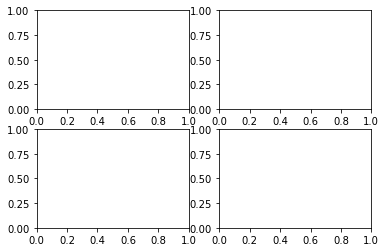

In [35]:
absolute_image_paths = r'\U4S3 Challenge\frog_images'

f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0][0])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")